# Desvio Padrão, Curva Normal e Variabilidade — exemplo simples (Altura/Peso)

## O que você vai aprender
- **Desvio padrão (DP):** mede quão *espalhados* os dados estão em torno da média.  
  Quanto maior o DP, maior a **variabilidade**; quanto menor o DP, mais os dados ficam **concentrados** perto da média.
- **Curva normal:** uma curva simétrica em forma de sino. Muitas variáveis do mundo real **aproximam** uma normal.
- **Regra empírica (68–95–99,7):** em uma distribuição aproximadamente normal:
  - Cerca de **68,26%** dos valores ficam entre **média ± 1 DP**;
  - Cerca de **95,44%** entre **média ± 2 DP**;
  - Cerca de **99,74%** entre **média ± 3 DP**.

## Qual é a base de dados?
Para simplificar, **vamos criar** um conjunto de dados **sintético** (apenas para fins didáticos):
- **Altura** (em metros): média **1,75** m e **desvio padrão 0,08** m (ou seja, 8 cm).  
- **Peso** (em kg): média **75** kg e desvio padrão **10** kg.

Trabalharemos **principalmente com a altura** para mostrar claramente as faixas de 1, 2 e 3 desvios em torno da média.

## Passos do notebook
1. **Gerar** o DataFrame com as colunas `altura_m` e `peso_kg`.  
2. **Calcular** média e desvio padrão da altura.  
3. **Contar** quantos valores estão dentro de ±1, ±2 e ±3 desvios (e as porcentagens observadas).  
4. **Desenhar** um histograma da altura e **sobrepor** a **curva normal** usando a média/DP observados, marcando as linhas de ±1σ, ±2σ, ±3σ.


In [2]:
# ===== 1) Gerar dados sintéticos de altura e peso =====
import numpy as np                  # operações numéricas
import pandas as pd                 # tabelas de dados
import matplotlib.pyplot as plt     # gráficos com matplotlib (sem estilos especiais)
from scipy.stats import norm        # para a curva normal (PDF)

np.random.seed(42)                  # reprodutibilidade dos resultados

# Parâmetros "verdadeiros" da simulação
media_altura  = 1.75                # média de altura (em metros)
desvio_altura = 0.08                # desvio padrão da altura (em metros) -> troque para 0.8 se quiser ver mais variabilidade
media_peso    = 75                  # média de peso (em kg)
desvio_peso   = 10                  # desvio padrão do peso (em kg)
n             = 500                 # tamanho da amostra (número de pessoas)

# Gerar alturas e pesos
alturas = np.random.normal(loc=media_altura, scale=desvio_altura, size=n)  # vetor de alturas simuladas
pesos   = np.random.normal(loc=media_peso,   scale=desvio_peso,   size=n)  # vetor de pesos simulados

# Montar o DataFrame com nomes em português
df = pd.DataFrame({
    'altura_m': alturas,   # altura em metros
    'peso_kg' : pesos      # peso em kg
})

# Dar uma olhada nas primeiras linhas (para confirmar que deu certo)
df.head()                  # por padrão, mostra 5 linhas


,altura_m,peso_kg
0,1.789737,84.261775
1,1.738939,94.094166
2,1.801815,61.014324
3,1.871842,80.629692
4,1.731268,68.493574


In [3]:
# ===== 2) Estatísticas básicas e faixas ±1σ, ±2σ, ±3σ =====
# Selecionar a coluna de interesse (altura)
x = df['altura_m']                        # série com as alturas

# Calcular média e desvio padrão (amostrais)
media = x.mean()                          # média observada da amostra
dp    = x.std(ddof=1)                     # desvio padrão amostral (Como os dados são amostrais, ddof=1, ou seja, temos um grau de liberdade, se fosse universal, seria ddof=0)

# Imprimir valores arredondados
print(f'Média da altura: {media:.3f} m')
print(f'Desvio padrão  : {dp:.3f} m')




Média da altura: 1.751 m
Desvio padrão  : 0.079 m


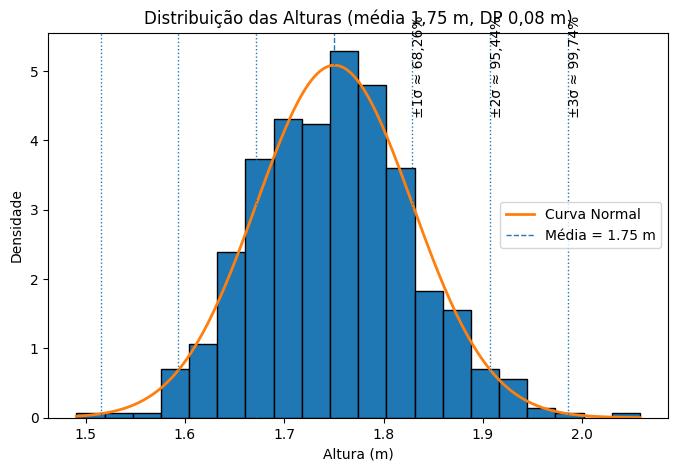

In [4]:
# ===== 3) Histograma da altura com Curva Normal e linhas de ±1σ, ±2σ, ±3σ =====
plt.figure(figsize=(8,5))                       # cria uma figura (tamanho em polegadas)

# Histograma normalizado (density=True) para compararmos com a densidade da Normal
plt.hist(df['altura_m'], bins=20, density=True, edgecolor='black')  # histograma

# Curva normal teórica ajustada pela média e DP observados
xs = np.linspace(df['altura_m'].min(), df['altura_m'].max(), 200)   # grade de valores no eixo x
ys = norm.pdf(xs, loc=media, scale=dp)                               # densidade da normal N(media, dp)
plt.plot(xs, ys, linewidth=2, label='Curva Normal')                  # desenha a curva

# Linha vertical na média
plt.axvline(media, linestyle='--', linewidth=1, label=f'Média = {media:.2f} m')

# Linhas verticais em ±1σ, ±2σ, ±3σ com anotações (68,26%, 95,44%, 99,74%)
faixas = [(1, '68,26%'), (2, '95,44%'), (3, '99,74%')]              # pares (k, texto)
for k, txt in faixas:
    plt.axvline(media - k*dp, linestyle=':', linewidth=1)            # linha à esquerda
    plt.axvline(media + k*dp, linestyle=':', linewidth=1)            # linha à direita
    ymax = ys.max() if len(xs)==len(ys) else 0.0                     # altura máx. da curva para posicionar o texto
    plt.text(media + k*dp, ymax*0.85, f'±{k}σ ≈ {txt}', rotation=90, va='bottom')

# Títulos e rótulos de eixos
plt.title('Distribuição das Alturas (média 1,75 m, DP 0,08 m)')
plt.xlabel('Altura (m)')
plt.ylabel('Densidade')
plt.legend()
plt.show()                                           # exibe o gráfico


# Sugestão

Tentem gerar uma curva normal, agora dessa vez com o peso

Média do peso: 75.32 kg
Desvio padrão : 9.78 kg


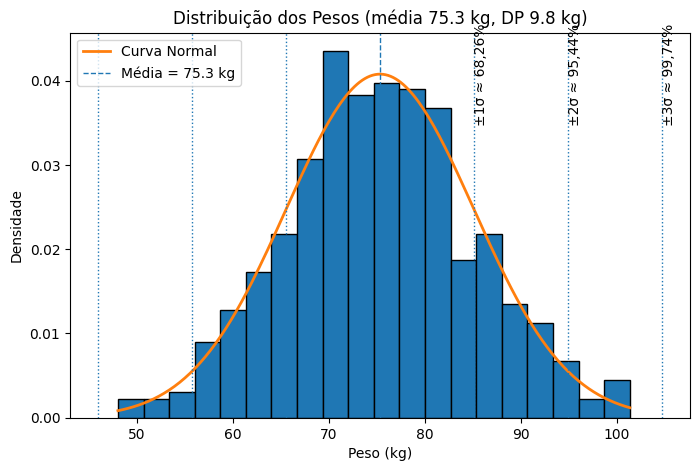

In [5]:
# ===== 4) Histograma do peso com Curva Normal =====
# Selecionar a coluna de interesse (peso)
peso = df['peso_kg']

# Calcular média e desvio padrão observados
media_peso = peso.mean()
dp_peso = peso.std(ddof=1)

print(f'Média do peso: {media_peso:.2f} kg')
print(f'Desvio padrão : {dp_peso:.2f} kg')

plt.figure(figsize=(8, 5))
plt.hist(peso, bins=20, density=True, edgecolor='black')

xs = np.linspace(peso.min(), peso.max(), 200)
ys = norm.pdf(xs, loc=media_peso, scale=dp_peso)
plt.plot(xs, ys, linewidth=2, label='Curva Normal')

plt.axvline(media_peso, linestyle='--', linewidth=1, label=f'Média = {media_peso:.1f} kg')

faixas = [(1, '68,26%'), (2, '95,44%'), (3, '99,74%')]
ymax = ys.max()
for k, txt in faixas:
    plt.axvline(media_peso - k * dp_peso, linestyle=':', linewidth=1)
    plt.axvline(media_peso + k * dp_peso, linestyle=':', linewidth=1)
    plt.text(media_peso + k * dp_peso, ymax * 0.85, f'±{k}σ ≈ {txt}', rotation=90, va='bottom')

plt.title(f'Distribuição dos Pesos (média {media_peso:.1f} kg, DP {dp_peso:.1f} kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidade')
plt.legend()
plt.show()
